In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

## One dimensional Gaussian distribution

一维高斯分布的概率密度函数如下：   

$$
N(x\mid \mu,\sigma)=\frac{1}{\sqrt{2\pi}\cdot\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

给定一些服从高斯分布的数据，通常利用极大似然估计法估计高斯分布的参数$\mu$和$\sigma$。
$$
L(\mu,\sigma)=\prod_{i=1}^MN(x_i\mid \mu,\sigma)
$$

$M$表示样本总量，我们要求解：  

$$
\mu^*,\sigma^*=arg\max_{\mu,\sigma}L(\mu,\sigma)
$$  

可以简单的理解为让样本出现的概率尽可能的大，由于累乘不好计算，通常会对似然函数取对数，将乘号变为加号，这时的目标函数表示如下：   

$$
L(\mu,\sigma)=\log(\prod_{i=1}^Mp(x_i\mid \mu,\sigma))=-M\log(\sqrt{2\pi}\cdot\sigma)-\sum_{i=1}^M\frac{(x-\mu)^2}{2\sigma^2}
$$ 

显然取对数后的最优解和取对数前一致，由于极值点必然是导数为0的点，所以，我们分别让$L(\mu,\sigma)$对$\mu,\sigma$求偏导，并令其为0，即可得到$\mu^*,\sigma^*$：  

$$
\frac{\partial L(\mu,\sigma)}{\partial \mu}=\frac{1}{\sigma^2}\sum_{i=1}^M(x_i-\mu)=0\Rightarrow \mu^*=\frac{\sum_{i=1}^Mx_i}{M}
$$

$$
\frac{\partial L(\mu,\sigma)}{\partial \sigma}=-M\frac{1}{\sigma}+\sum_{i=1}^M(x-\mu)^2\sigma^{-3}=0\Rightarrow\sigma^*=\sqrt{\frac{\sum_{i=1}^M(x-\mu^*)^2}{M}}
$$

实际上这里对于均值的估计是无偏，而对于方差的估计是有偏的。

(-0.1, 1.0)

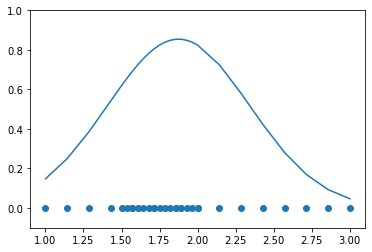

In [78]:
data=np.sort(np.linspace(1,3,15).tolist()+np.linspace(1.5,2,15).tolist())
def gaussian_1d(x,u,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*np.power(x-u,2)/(2*sigma**2))
u=np.mean(data)
sigma=np.std(data)
plt.scatter(data,[0]*len(data))
plt.plot(data,gaussian_1d(data,u,sigma))
plt.ylim(-0.1,1)

## Mixed Gaussian distribution

对于单个的高斯分布来说通过以上的求解会起到非常好的效果，但是假如数据是由多个高斯分布混合生成的，那么用原始的一维高斯分布进行拟合效果就会大幅度下降。

(-0.1, 1.0)

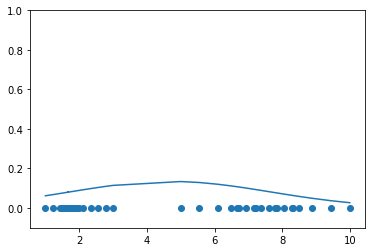

In [79]:
data1=sorted(np.linspace(1,3,10).tolist()+np.linspace(1.5,2,10).tolist())
data2=sorted(np.linspace(5,10,10).tolist()+np.linspace(6.5,8.5,10).tolist())
u=np.mean(data1+data2)
sigma=np.std(data1+data2)
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,gaussian_1d(data1+data2,u,sigma))
plt.ylim(-0.1,1)

直接用1个高斯分布对上述数据进行拟合明显误差较大，根据数据分布的密度来看，明显可能是由两个高斯分布生成的。我们分别构建两个高斯分布去拟合数据。

(-0.1, 1.0)

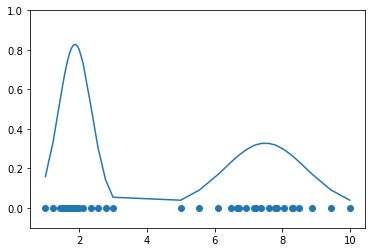

In [80]:
data1=sorted(np.linspace(1,3,10).tolist()+np.linspace(1.5,2,10).tolist())
data2=sorted(np.linspace(5,10,10).tolist()+np.linspace(6.5,8.5,10).tolist())
u1=np.mean(data1)
u2=np.mean(data2)
sigma1=np.std(data1)
sigma2=np.std(data2)
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,gaussian_1d(data1+data2,u1,sigma1)+gaussian_1d(data1+data2,u2,sigma2))
plt.ylim(-0.1,1)

实际上上图的概率密度函数的面积为2，显然不合理，可以将两个高斯分布的权重都设置为0.5，实际上只要满足
$$
\alpha_1+\alpha_2=1,\alpha_1\geq 0,\alpha_2\geq 0
$$  
即可。

(-0.1, 1.0)

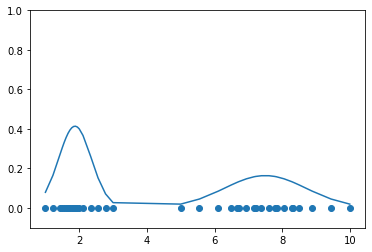

In [81]:
alpha1=0.5
alpha2=0.5
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,alpha1*gaussian_1d(data1+data2,u1,sigma1)+alpha2*gaussian_1d(data1+data2,u2,sigma2))
plt.ylim(-0.1,1)

对于上述模型的求解我们实际上是人为指定了数据是由两个高斯分布混合而成的，而且还认为指定了两个高斯分布的的权重为0.5。实际上，我们希望算法能够从数据中学习这些信息，而且，有些数据分布是无法通过观测得到每个高斯分布所占的权重的。

假设数据是有两个高斯分布混合而成的，那么高斯混合模型可以表示为：
$$
P(x\mid\theta)=\alpha_1N_1(x\mid \mu_1,\sigma_1)+(1-\alpha_1)N_2(x\mid \mu_2,\sigma_2)=\sum_{i=1}^2\alpha_iN_i(x\mid \mu_i,\sigma_i),\alpha_2=1-\alpha_1
$$  

其中，模型参数为$\theta=\{u_1,\sigma_1,u_2,\sigma_2,\alpha_1\}$。那么通过极大似然估计来求解模型参数：

$$
L(\theta)=log(\prod_{i=1}^MP(x_i\mid \theta))=\sum_{i=1}^MlogP(x_i\mid \theta)=\sum_{i=1}^Mlog[\sum_{k=1}^2\alpha_kN_k(x_i\mid \mu_k,\sigma_k)]
$$  

求解方法也是对参数求偏导：
$$
\frac{\partial L(\theta)}{\partial \mu_k}=\sum_{i=1}^M\frac{\frac{\alpha_k(x_i-\mu_k)}{\sqrt{2\pi}\sigma_k^3}exp(-\frac{(x_i-\mu_k)^2}{2\sigma_k^2})}{\sum_{j=1}^2\alpha_jN_j(x_i\mid \mu_j,\sigma_j)}=0 
$$  

很明显直接求解一定是求不出来的，因此通常采用EM算法。

## Expectation-Maximization algorithm

### Probabilistic Model

概率模型的分类通常包括三部分：
1. 假设概率分布的具体表达式$P(X|C)$，例如高斯分布$\mathcal{N}(\mu, \sigma)$，在高斯分布中有两个待求参数。
2. 构造一个目标函数，可以使用最大后验估计、极大似然估计等方法。
3. 解目标函数优化问题求出分布中的未知数。

在高斯混合模型中，我们的概率分布是混合高斯分布，通过高斯分布构造了极大似然估计的目标函数:
$$
\theta^*=arg\max_\theta P(X\mid \theta)
$$  
其中$\theta$为模型参数，$X$为可观测数据，但是呢，$P(X\mid\theta)$可能会比较复杂，比如上一节的多个高斯分布的情况，这时，我们可以将$P(X\mid\theta)$拆分为两部分：   

$$
P(X\mid\theta)=\sum_{Z}P(Z\mid\theta)P(X\mid\theta,Z)
$$  

这里$Z$是我们定义的一个辅助变量，它无法被直接观测到，所以称其为隐变量。实际上上面的等式相当于对$P(X\mid\theta)$做了一个全概率展开。


关于隐变量，我们观测到的混合高斯模型的数据是这样的：

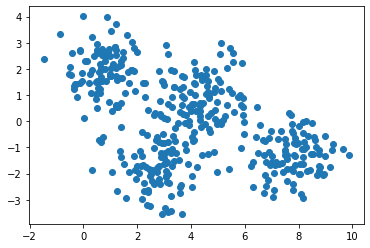

In [82]:
data=np.vstack((np.random.random(size=(50,2))*0.3+[0.3,0.4],np.random.random(size=(50,2))*1.5))
u=np.mean(data,axis=0)
sigma=np.cov(data.T)
def gaussian_nd(x,u,sigma):
    return 1.0/(np.power(2*np.pi,x.shape[1]/2)*np.sqrt(np.linalg.det(sigma)))*np.exp(np.sum(-0.5*(x-u).dot(np.linalg.inv(sigma))*(x-u),axis=1))
def plot_contourf(data,func,lines=3):
    n = 256
    x = np.linspace(data[:,0].min(), data[:,0].max(), n)
    y = np.linspace(data[:,1].min(), data[:,1].max(), n)
    X, Y = np.meshgrid(x,y)
    C = plt.contour(X,Y, func(np.c_[X.reshape(-1),Y.reshape(-1)]).reshape(X.shape), lines, colors='g', linewidth=0.5)
    plt.clabel(C, inline=True, fontsize=10)
    plt.scatter(data[:,0],data[:,1])


X, y = make_blobs(n_samples=400, centers=4,cluster_std=0.85, random_state=0)
X = X[:, ::-1]
plt.scatter(X[:,0],X[:,1])

我们只能观测到数据的散点分布，但是我们并不能知道某一个数据点到底属于哪一个高斯分布，那么数据点属于哪个高斯分布就可以看作是隐变量。

### EM algorithm

EM的求解思想是寻找一个参数序列，它们能使得似然估计值逐步提升，即：
$$
\theta^{t+1}=\mathop{argmax}\limits_{\theta}\int_z\log [p(x,z|\theta)]p(z|x,\theta^t)dz=\mathbb{E}_{z|x,\theta^t}[\log p(x,z|\theta)]   
$$
$$
\theta^1->\theta^2->,...,->\theta^i\Rightarrow L(\theta^1)<L(\theta^2)<\cdots<L(\theta^i)
$$  
这个公式包含了迭代的两步：

1.  E step：计算 $\log p(x,z|\theta)$ 在概率分布 $p(z|x,\theta^t)$ 下的期望
2.  M step：计算使这个期望最大化的参数得到下一个 EM 步骤的输入
   
假如，当前轮为第$i$轮，当前的参数为$\theta^i$，那么下一步即是在此基础上找到一个$\theta^{i+1}$使得$L(\theta^{i+1})>L(\theta^i)$；   

按照条件概率公式，我们可以对$P(X\mid\theta)$做如下变换：   

$$
P(X\mid\theta)=\frac{P(X,Z\mid\theta)}{P(Z\mid X,\theta)}
$$
notes:
$$
P(X,Z|\theta) = P(Z|X,\theta)*P(X|\theta)\Rightarrow P(X\mid\theta)=\frac{P(X,Z\mid\theta)}{P(Z\mid X,\theta)}
$$
所以：  

$$
L(\theta)=logP(X\mid\theta)=logP(X,Z\mid\theta)-logP(Z\mid X,\theta)
$$  

那么，如何用到上一步$\theta^i$的信息呢？既然上一步学到了$\theta^i$，那么我们可以在此基础上求得一个关于的$Z$的分布，即$P(Z\mid X,\theta^i)$，所以，我们可以求$L(\theta)$在分布$P(Z\mid X,\theta^i)$上的期望：  

$$
\sum_{Z}logP(X\mid\theta)P(Z\mid X,\theta^i)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)-\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)\\
\Rightarrow logP(X\mid\theta)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)-\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)\\
\Rightarrow L(\theta)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)-\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)\\
\Rightarrow L(\theta)=Q(\theta,\theta^i)-H(\theta,\theta^i)
$$

如果是连续变量，则将求和换成积分：

$\log p(x|\theta)=\log p(z,x|\theta)-\log p(z|x,\theta)$，对左右两边求积分：

$$
Left:\int_zp(z|x,\theta^t)\log p(x|\theta)dz=\log p(x|\theta)
$$

$$
Right:\int_zp(z|x,\theta^t)\log p(x,z|\theta)dz-\int_zp(z|x,\theta^t)\log p(z|x,\theta)dz=Q(\theta,\theta^t)-H(\theta,\theta^t)
$$

因此 
$$
\log p(x|\theta)=Q(\theta,\theta^t)-H(\theta,\theta^t)
$$

由于 $Q(\theta,\theta^t)=\int_zp(z|x,\theta^t)\log p(x,z|\theta)dz$，而 $\theta^{t+1}=\mathop{argmax}\limits_{\theta}\int_z\log [p(x,z|\theta)]p(z|x,\theta^t)dz$，所以 $Q(\theta^{t+1},\theta^t)\ge Q(\theta^t,\theta^t)$。要证 $\log p(x|\theta^t)\le\log p(x|\theta^{t+1})$，需证：$H(\theta^t,\theta^t)\ge H(\theta^{t+1},\theta^t)$：

$$
H(\theta^{t+1},\theta^t)-H(\theta^{t},\theta^t)\\
=\int_zp(z|x,\theta^{t})\log p(z|x,\theta^{t+1})dz-\int_zp(z|x,\theta^t)\log p(z|x,\theta^{t})dz\\
=\int_zp(z|x,\theta^t)\log\frac{p(z|x,\theta^{t+1})}{p(z|x,\theta^t)}\\
=-KL(p(z|x,\theta^t),p(z|x,\theta^{t+1}))\le0
$$

因此可以证明：
$$
\log p(x|\theta^t)\le\log p(x|\theta^{t+1})
$$

根据上面的证明，我们看到，似然函数在每一步都会增大。

### EM algorithm iteration

引入辅助分布$q(z)$

$$
 \log p(x|\theta)=\log p(z,x|\theta)-\log p(z|x,\theta)=\log \frac{p(z,x|\theta)}{q(z)}-\log \frac{p(z|x,\theta)}{q(z)}
				$$

分别对两边求期望 $\mathbb{E}_{q(z)}$：

$$
Left:\int_zq(z)\log p(x|\theta)dz=\log p(x|\theta)\\
Right:\int_zq(z)\log \frac{p(z,x|\theta)}{q(z)}dz-\int_zq(z)\log \frac{p(z|x,\theta)}{q(z)}dz=ELBO+KL(q(z),p(z|x,\theta))
$$

上式中，Evidence Lower Bound(ELBO)，是一个下界，所以 $\log p(x|\theta)\ge ELBO$，等于号取在 KL 散度为0是，即：$q(z)=p(z|x,\theta)$，EM 算法的目的是将 ELBO 最大化，根据上面的证明过程，在每一步 EM 后，求得了最大的ELBO，并根据这个使 ELBO 最大的参数代入下一步中：

$$
\hat{\theta}=\mathop{argmax}_{\theta}ELBO=\mathop{argmax}_\theta\int_zq(z)\log\frac{p(x,z|\theta)}{q(z)}dz
$$

由于 $ q(z)=p(z|x,\theta^t)$ 的时候，这一步的最大值才能取等号，所以：

$$
\hat{\theta}=\mathop{argmax}_{\theta}ELBO\\
=\mathop{argmax}_\theta\int_zq(z)\log\frac{p(x,z|\theta)}{q(z)}dz\\
=\mathop{argmax}_\theta\int_zp(z|x,\theta^t)\log\frac{p(x,z|\theta)}{p(z|x,\theta^t)}d z\\
=\mathop{argmax}_\theta\int_z p(z|x,\theta^t)\log p(x,z|\theta)
$$
					

这个式子就是上面 EM 迭代过程中的式子。

从 Jensen 不等式出发，也可以导出这个式子：
$$
\log p(x|\theta)=\log\int_zp(x,z|\theta)dz=\log\int_z\frac{p(x,z|\theta)q(z)}{q(z)}dz\\=\log \mathbb{E}_{q(z)}[\frac{p(x,z|\theta)}{q(z)}]\ge \mathbb{E}_{q(z)}[\log\frac{p(x,z|\theta)}{q(z)}]
$$
					

其中，右边的式子就是 ELBO，等号在 $ p(x,z|\theta)=Cq(z)$ 时成立。于是：

$$
\int_zq(z)dz=\frac{1}{C}\int_zp(x,z|\theta)dz=\frac{1}{C}p(x|\theta)=1\\\Rightarrow q(z)=\frac{1}{p(x|\theta)}p(x,z|\theta)=p(z|x,\theta)
$$

## EM algorithm steps

1. 对所有输入数据随机分配标签，即对数据随便分类。
   
   repeat:

2. 对每一类数据点求均值和方差，得到新的高斯分布
3. 根据新的高斯分布对数据重新分类

![avatar](../Fig/GMM.png)

d:\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


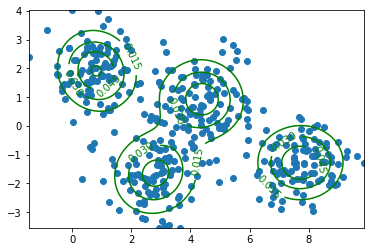

In [83]:
theta=[]
for i in range(0,4):
    theta.append((np.mean(X[y==i],axis=0),np.cov(X[y==i].T)))
plot_contourf(X,lambda x:np.sum([0.25*gaussian_nd(x,u,sigma) for u,sigma in theta],axis=0),lines=5)

In [84]:
def plot_decision_function(X, y, clf, support_vectors=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    # 绘制支持向量
    if support_vectors is not None:
        plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=80, c='none', alpha=0.7, edgecolor='red')
def gaussian_nd(x, u, sigma):
    """
    高维高斯函数
    :param x:
    :param u:
    :param sigma:
    :return:
    """
    if x.ndim == 1:
        x = np.expand_dims(x, axis=0)
    return 1.0 / (np.power(2 * np.pi, x.shape[1] / 2) * np.sqrt(np.linalg.det(sigma))) * np.exp(
        np.sum(-0.5 * (x - u).dot(np.linalg.inv(sigma)) * (x - u), axis=1))
class GMMCluster(object):
    def __init__(self, n_components=1, tol=1e-5, n_iter=100, verbose=False):
        """
        使用EM训练GMM
        :param n_components: 高斯混合模型数量
        :param tol: -log likehold增益<tol时，停止训练
        :param n_iter: 最多迭代次数
        :param verbose: 是否可视化训练过程
        """
        self.n_components = n_components
        self.tol = tol
        self.n_iter = n_iter
        self.verbose = verbose
        # 高斯模型参数
        self.params = []

    def fit(self, X):
        n_sample, _ = X.shape
        # 初始化参数
        u = np.mean(X, axis=0)
        sigma = np.cov(X.T)
        alpha = 1.0 / self.n_components
        max_value = X.max()
        min_value = X.min()
        for _ in range(0, self.n_components):
            # 每个高斯模型的权重初始化一样
            # 每个高斯模型的均值在整体均值的基础上添加一个随机的bias
            # 方差初始化一样，使用整体的方差
            self.params.append([alpha, u + np.random.random() * (max_value + min_value) / 2, sigma])
        # 计算当前的隐变量
        W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
        # 记录当前的log like hold
        current_log_loss = np.log(W.sum(axis=1)).sum() / n_sample
        W = W / np.sum(W, axis=1, keepdims=True)
        # 迭代训练
        for _ in range(0, self.n_iter):
            if self.verbose is True:
                plot_contourf(X, lambda x: np.sum(
                    [alpha * gaussian_nd(x, u, sigma) for alpha, u, sigma in self.params], axis=0), lines=5)
                plt.pause(0.1)
                plt.clf()
            # 更新高斯模型参数
            for k in range(0, self.n_components):
                self.params[k][0] = W[:, k].sum() / n_sample  # 更新alpha
                self.params[k][1] = np.sum(W[:, [k]] * X, axis=0) / W[:, k].sum()  # 更新均值
                self.params[k][2] = np.sum(
                    [W[i, k] * (X[[i]] - self.params[k][1]).T.dot(X[[i]] - self.params[k][1]) for i in
                     range(0, n_sample)], axis=0) / W[:, k].sum()  # 更新方差
            # 更新当前的隐变量
            W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
            # 计算log like hold
            new_log_loss = np.log(W.sum(axis=1)).sum() / n_sample
            W = W / np.sum(W, axis=1, keepdims=True)
            if new_log_loss - current_log_loss > self.tol:
                current_log_loss = new_log_loss
            else:
                break
        if self.verbose:
            plot_contourf(X, lambda x: np.sum(
                [alpha * gaussian_nd(x, u, sigma) for alpha, u, sigma in self.params], axis=0), lines=5)
            plt.show()

    def predict_proba(self, X):
        # 预测样本在几个高斯模型上的概率分布
        W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
        W = W / np.sum(W, axis=1, keepdims=True)
        return W

    def predict(self, X):
        # 预测样本最有可能产生于那一个高斯模型
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_sample_generate_proba(self, X):
        # 返回样本的生成概率
        W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
        return np.sum(W, axis=1)

d:\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


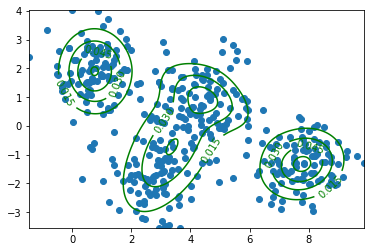

In [85]:
gmm = GMMCluster(verbose=False,n_iter=200,n_components=4,tol=1e-5)
gmm.fit(X)
plot_contourf(X,gmm.predict_sample_generate_proba,lines=5)

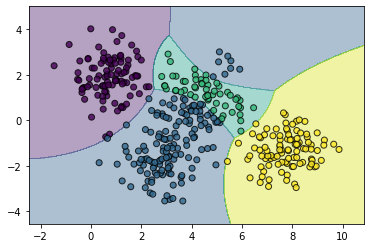

In [86]:
plot_decision_function(X,gmm.predict(X),gmm)